<a href="https://colab.research.google.com/github/Nermen-Salama/python-learn/blob/main/Dog%20Breed%20Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset**

In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/CovidDataset/Train"
VAL_PATH = "/content/drive/MyDrive/CovidDataset/Val"

In [ ]:
!wget --header="Host: s3-us-west-1.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://notebooks.githubusercontent.com/" "https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip" -c -O 'dogImages.zip'

**Importing Libraries**

In [ ]:
import numpy as np #Library that is used for dealing with arrays
import matplotlib.pyplot as plt #Library that is used for plotting
import keras #Deep learning framework
from keras.layers import * #allows me to import the layers (CNN building blocks) from keras framework
from keras.models import * #import different keras models
from keras.preprocessing import image #helps me on data augmentation

**Data Augmentation**

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

**Deployement of Model (Model Building)**

In [ ]:
#Use the concept of grid search and try different optimizers and decicde which one will be better 
#Use this documentation to know the different optimizers available on keras https://keras.io/api/optimizers/  
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
#model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

**Model Training**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'binary')
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/10
8/8 [==============================] - 120s 15s/step - loss: 2.1860 - accuracy: 0.4688 - val_loss: 0.6941 - val_accuracy: 0.4375
Epoch 2/10
8/8 [==============================] - 42s 5s/step - loss: 0.6907 - accuracy: 0.5938 - val_loss: 0.6907 - val_accuracy: 0.5938
Epoch 3/10
8/8 [==============================] - 22s 3s/step - loss: 0.6805 - accuracy: 0.5469 - val_loss: 0.6816 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 22s 3s/step - loss: 0.6617 - accuracy: 0.5391 - val_loss: 0.6561 - val_accuracy: 0.8438
Epoch 5/10
8/8 [==============================] - 18s 2s/step - loss: 0.5870 - accuracy: 0.6875 - val_loss: 0.5120 - val_accuracy: 0.8750
Epoch 6/10
8/8 [==============================] - 18s 2s/step - loss: 0.4692 - accuracy: 0.7969 - val_loss: 0.4121 - val_accuracy: 0.9375
Epoch 7/10
8/8 [==============================] - 17s 2s/step - loss: 0.4241 - accuracy: 0.8125 - val_loss: 0.3308 - val_accuracy: 0.9688
Epoch 8/10
8/8 [================

**Save the trained model**

In [ ]:
model.save("/content/drive/MyDrive/CovidDataset/covid_19.h5")

**Plotting training accuracy**

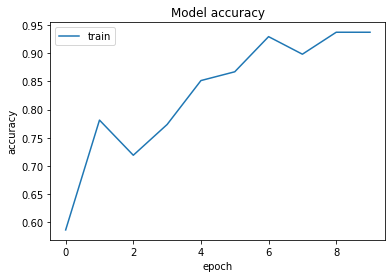

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

**Plotting validation accuracy**

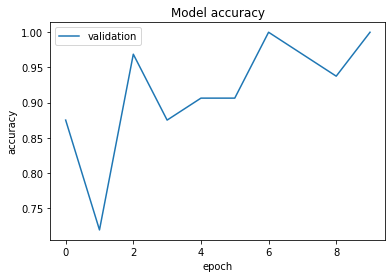

In [ ]:
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'],loc='upper left')
plt.show()

**Getting Results**

In [ ]:
train_generator.class_indices

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        30
           1       1.00      0.50      0.67        30

    accuracy                           0.75        60
   macro avg       0.83      0.75      0.73        60
weighted avg       0.83      0.75      0.73        60



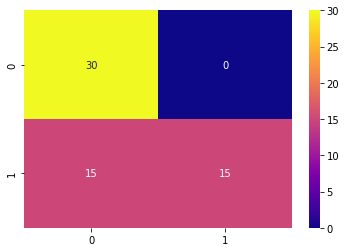

In [ ]:
import os 
y_actual=[]
y_test=[]
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Normal/"):
  img=image.load_img("/content/drive/MyDrive/CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=(model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Covid/"):
  img=image.load_img("/content/drive/MyDrive/CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=(model.predict(img)>0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(0)

y_actual=np.array(y_actual)
y_test=np.array(y_test)

from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
import seaborn as sns

#plotting confusion metrics
cm=confusion_matrix(y_actual,y_test)
from sklearn.metrics import classification_report
sns.heatmap(cm,cmap="plasma",annot=True)

#getting numerical metrics 
print(classification_report(y_actual,y_test))



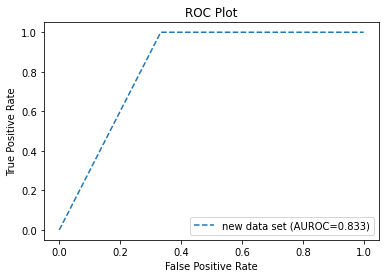

In [ ]:
#plotting ROC curve 
r_auc_new_dataset=roc_auc_score(y_test,y_actual)
r_fpr_new_dataset,r_tpr_new_dataset,_=roc_curve(y_test,y_actual)
plt.plot(r_fpr_new_dataset,r_tpr_new_dataset,linestyle='--',label='new data set (AUROC=%0.3f)' %r_auc_new_dataset)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

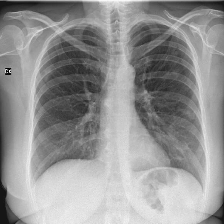

COVID19


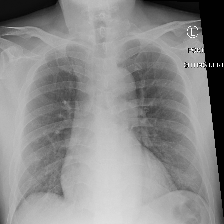

COVID19


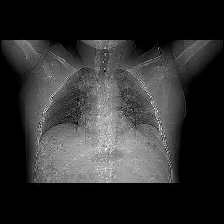

COVID19


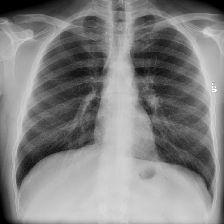

COVID19


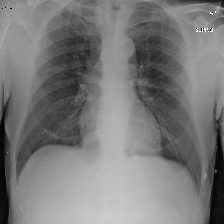

COVID19


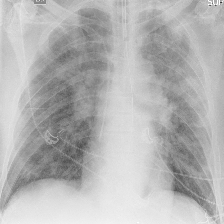

COVID19


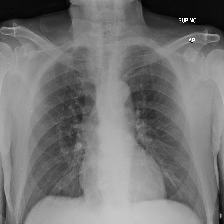

COVID19


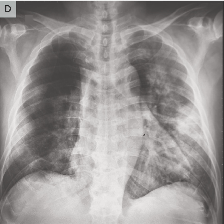

COVID19


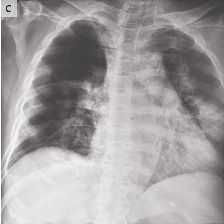

COVID19


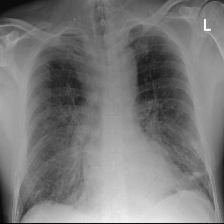

COVID19


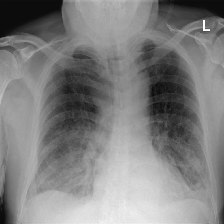

COVID19


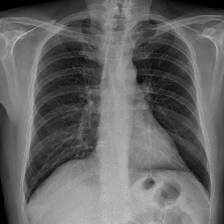

COVID19


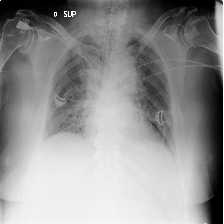

COVID19


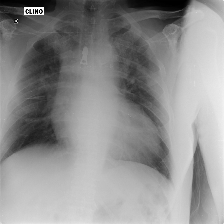

COVID19


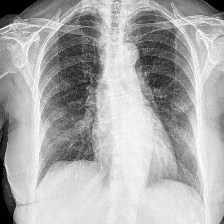

COVID19


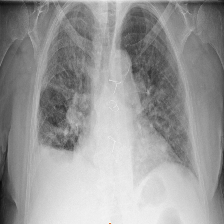

COVID19


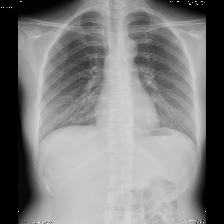

COVID19


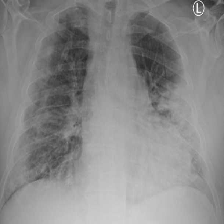

COVID19


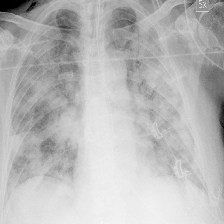

COVID19


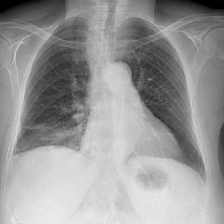

COVID19


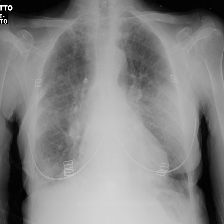

COVID19


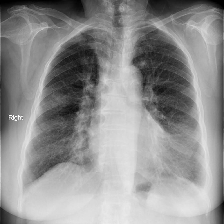

COVID19


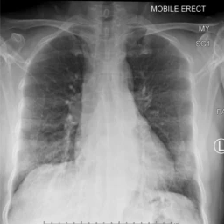

COVID19


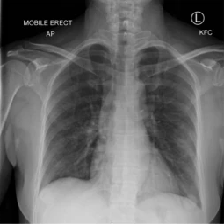

COVID19


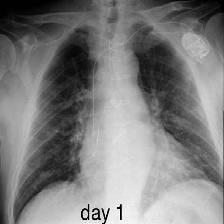

COVID19


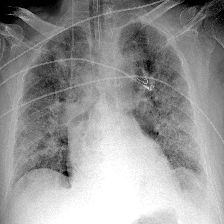

COVID19


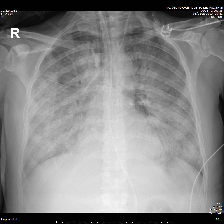

COVID19


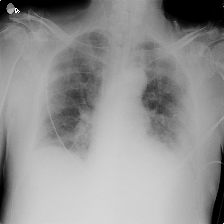

COVID19


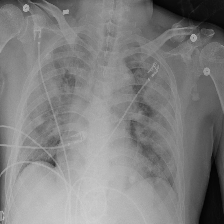

COVID19


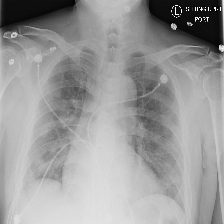

COVID19


In [ ]:
CATEGORIES=["COVID19","Normal"]
from google.colab.patches import cv2_imshow
#testing for COVID-19 images
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Covid/"):
  img=image.load_img("/content/drive/MyDrive/CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  cv2_imshow(img)
  img=np.expand_dims(img,axis=0)
  prediction=model.predict(img)
  print(CATEGORIES[int (prediction[0][0])])

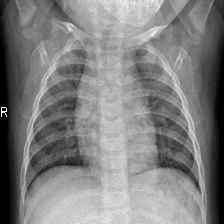

Normal


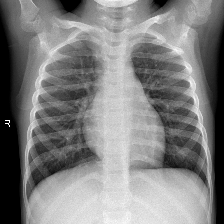

Normal


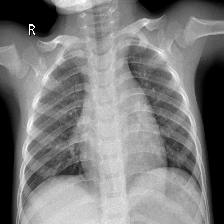

COVID19


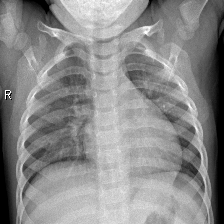

COVID19


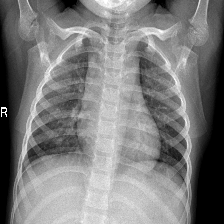

COVID19


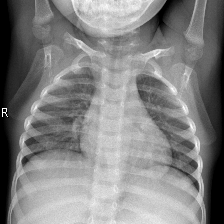

COVID19


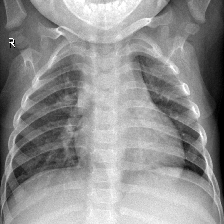

COVID19


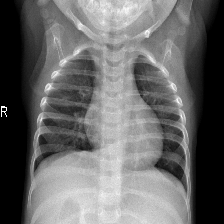

Normal


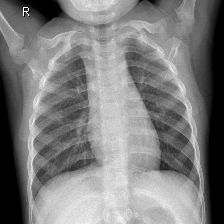

COVID19


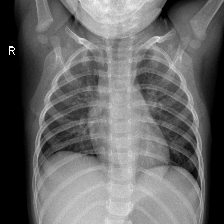

Normal


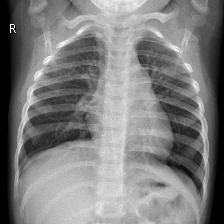

COVID19


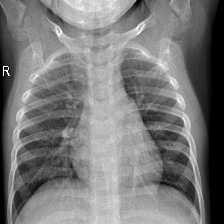

COVID19


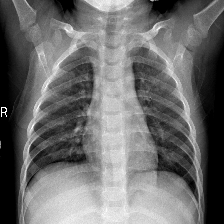

Normal


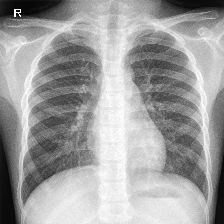

COVID19


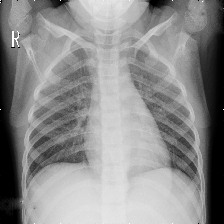

COVID19


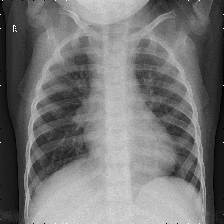

COVID19


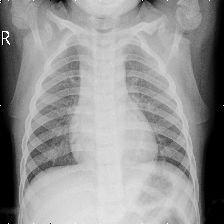

COVID19


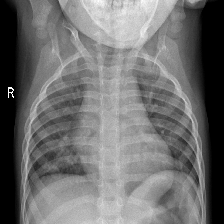

Normal


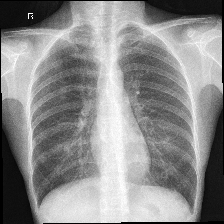

COVID19


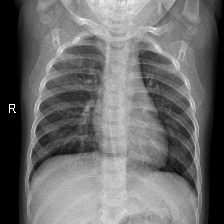

Normal


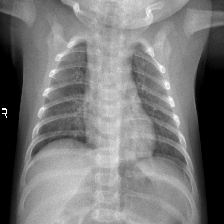

Normal


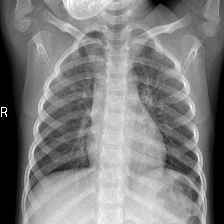

COVID19


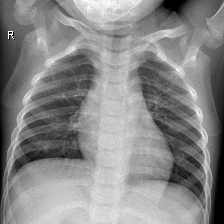

COVID19


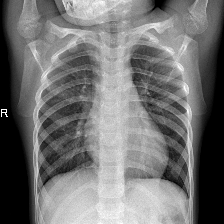

Normal


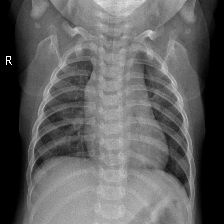

Normal


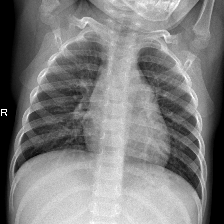

COVID19


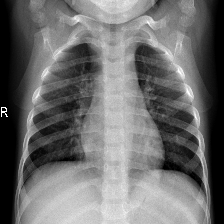

Normal


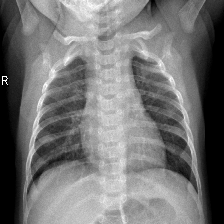

Normal


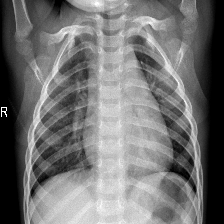

Normal


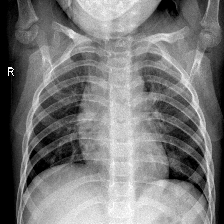

Normal


In [ ]:
#testing for normal images
for i in os.listdir("/content/drive/MyDrive/CovidDataset/Val/Normal/"):
  img=image.load_img("/content/drive/MyDrive/CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  cv2_imshow(img)
  img=np.expand_dims(img,axis=0)
  prediction=model.predict(img)
  print(CATEGORIES[int (prediction[0][0])])